# ADNI Connectome Baseline Models

## Setup & Data Preparation

In [1]:
import numpy as np
import pandas as pd
from plotnine import *
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, log_loss, f1_score
import seaborn as sns

from sklearn.neural_network import MLPClassifier, MLPRegressor

In [2]:
np.random.seed(42)

In [3]:
adni_data = pd.read_csv(r'ADNI_Tau_Amyloid_SUVR_amyloid_tau_status_dems.csv')
adni_data.insert(0, 'UID', range(0, len(adni_data)))
adni_data

<ipython-input-3-1bba23045ac8>:1: DtypeWarning: Columns (314) have mixed types. Specify dtype option on import or set low_memory=False.


,UID,ID,age,sex,group,pet.modality,modality.description,image.id,ses,acq.date,...,t.diff.uwn.psych.pet.yrs,ADAS13,MMSE,mPACCtrailsB,t.diff.adas.pet.yrs,PHASE,DX,SITEID,t.diff.diagnosis.pet.yrs,Phase
0,0,sub-0021,80,F,CN,pet-AV45,"AV45 Coreg, Avg, Standardized Image and Voxel ...",I338512,ses-2012-10-03,2012-10-03,...,0.000000,1.00,28.0,1.299940,0.000000,NaN,CN,8,0.021918,ADNI2
1,1,sub-0021,85,F,CN,pet-AV1451,"AV1451 Coreg, Avg, Standardized Image and Voxe...",I964024,ses-2018-02-02,2018-02-02,...,-0.183562,12.33,27.0,-2.151210,-0.183562,NaN,CN,8,0.065753,ADNI3
2,2,sub-0021,83,F,CN,pet-AV45,"AV45 Coreg, Avg, Standardized Image and Voxel ...",I557331,ses-2015-11-05,2015-11-05,...,-0.024658,5.00,27.0,-0.816517,-0.024658,NaN,CN,8,0.013699,ADNI2
3,3,sub-0021,78,F,CN,pet-AV45,"AV45 Coreg, Avg, Standardized Image and Voxel ...",I196544,ses-2010-10-08,2010-10-08,...,-0.002740,4.00,29.0,0.355272,-0.002740,NaN,CN,8,0.027397,ADNIGO
4,4,sub-0021,85,F,CN,pet-AV45,"AV45 Coreg, Avg, Standardized Image and Voxel ...",I943941,ses-2017-11-28,2017-11-28,...,-0.002740,12.33,27.0,-2.151210,-0.002740,NaN,CN,8,0.246575,ADNI3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2958,2958,sub-6887,73,F,MCI,pet-AV1451,ADNI3-TAU 2 (AC),I1360700,ses-2020-10-27,2020-10-27,...,NaN,22.33,26.0,-8.167770,-0.060274,NaN,MCI,26,-0.049315,ADNI3
2959,2959,sub-6888,64,F,MCI,pet-AV1451,PET1 Tau,I1346966,ses-2020-10-07,2020-10-07,...,NaN,15.67,26.0,-3.761820,0.000000,NaN,MCI,45,-0.016438,ADNI3
2960,2960,sub-6889,68,M,MCI,pet-AV1451,BRAIN ADNI Tau,I1350177,ses-2020-10-16,2020-10-16,...,NaN,29.00,28.0,-5.300670,0.019178,NaN,MCI,24,-0.057534,ADNI3
2961,2961,sub-6890,66,M,MCI,pet-AV1451,AV-1451 PET BRAIN TOF Tau,I1380834,ses-2020-12-01,2020-12-01,...,NaN,12.00,29.0,-1.200640,0.000000,NaN,MCI,16,0.035616,ADNI3


In [4]:
adni_data.isna().sum()

UID                            0
ID                             0
age                            0
sex                            0
group                          0
                            ... 
PHASE                       2963
DX                             0
SITEID                         0
t.diff.diagnosis.pet.yrs       0
Phase                          0
Length: 345, dtype: int64

In [5]:
schaefer_cols = ["UID"] + ["SUVR.Schaefer200.ROI.idx." + str(i+1) for i in range(200)]
schaefer_data = adni_data[schaefer_cols]
schaefer_data

,UID,SUVR.Schaefer200.ROI.idx.1,SUVR.Schaefer200.ROI.idx.2,SUVR.Schaefer200.ROI.idx.3,SUVR.Schaefer200.ROI.idx.4,SUVR.Schaefer200.ROI.idx.5,SUVR.Schaefer200.ROI.idx.6,SUVR.Schaefer200.ROI.idx.7,SUVR.Schaefer200.ROI.idx.8,SUVR.Schaefer200.ROI.idx.9,...,SUVR.Schaefer200.ROI.idx.191,SUVR.Schaefer200.ROI.idx.192,SUVR.Schaefer200.ROI.idx.193,SUVR.Schaefer200.ROI.idx.194,SUVR.Schaefer200.ROI.idx.195,SUVR.Schaefer200.ROI.idx.196,SUVR.Schaefer200.ROI.idx.197,SUVR.Schaefer200.ROI.idx.198,SUVR.Schaefer200.ROI.idx.199,SUVR.Schaefer200.ROI.idx.200
0,0,0.912861,1.027390,1.008220,0.805798,0.875110,0.821643,0.907071,1.034550,0.975376,...,0.912689,1.06826,1.246190,0.865687,0.763793,0.98544,0.871139,1.034290,0.942815,0.804263
1,1,1.126000,1.170820,1.251360,1.048210,1.180930,1.010690,1.149200,1.288490,1.217560,...,1.112320,1.14397,1.188070,1.053550,1.043640,1.14649,1.056160,1.140230,1.225610,1.112540
2,2,0.899505,0.988366,1.033340,0.765973,0.853984,0.795635,0.923348,1.050390,0.944791,...,0.903087,1.08784,1.376050,0.854033,0.780502,1.04015,0.830035,1.026090,0.954537,0.799052
3,3,1.007220,1.088650,0.970595,0.893735,0.827041,0.857132,0.942682,0.978126,0.934361,...,0.961301,1.13277,1.317870,1.030850,0.952838,1.17161,1.013260,1.032840,0.994306,0.864386
4,4,0.877004,0.913539,1.023010,0.767148,0.865806,0.748623,0.910673,1.133450,1.013790,...,0.955938,1.05976,1.331580,0.888267,0.894880,1.12678,0.993033,0.982823,1.022410,0.888255
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2958,2958,1.218620,1.122030,1.111030,1.125010,0.855755,1.137070,0.969142,1.205230,1.111000,...,1.121840,1.07066,1.138020,1.082990,1.139270,1.40042,1.285760,1.172920,1.406240,1.263950
2959,2959,1.126700,1.161370,1.092240,1.011810,1.244090,1.048300,1.098840,1.099880,1.199540,...,1.078490,1.03851,1.021830,1.039310,1.019040,1.17065,1.051320,1.096650,1.160920,1.173900
2960,2960,1.183060,1.099880,1.135840,1.040360,1.015300,1.062880,1.022340,1.191660,1.128320,...,1.120020,1.09521,1.044810,1.090510,0.972702,1.11362,1.044490,1.087520,1.175900,1.111850
2961,2961,1.087770,1.175930,1.232470,1.085160,1.247990,0.954582,1.172260,1.159190,1.228610,...,1.020380,1.05419,0.990162,1.047310,0.939460,1.02765,1.016240,1.050370,1.156320,1.206880


In [6]:
schaefer_data.describe()

,UID,SUVR.Schaefer200.ROI.idx.1,SUVR.Schaefer200.ROI.idx.2,SUVR.Schaefer200.ROI.idx.3,SUVR.Schaefer200.ROI.idx.4,SUVR.Schaefer200.ROI.idx.5,SUVR.Schaefer200.ROI.idx.6,SUVR.Schaefer200.ROI.idx.7,SUVR.Schaefer200.ROI.idx.8,SUVR.Schaefer200.ROI.idx.9,...,SUVR.Schaefer200.ROI.idx.191,SUVR.Schaefer200.ROI.idx.192,SUVR.Schaefer200.ROI.idx.193,SUVR.Schaefer200.ROI.idx.194,SUVR.Schaefer200.ROI.idx.195,SUVR.Schaefer200.ROI.idx.196,SUVR.Schaefer200.ROI.idx.197,SUVR.Schaefer200.ROI.idx.198,SUVR.Schaefer200.ROI.idx.199,SUVR.Schaefer200.ROI.idx.200
count,2963.000000,2963.000000,2963.000000,2963.000000,2963.000000,2963.000000,2963.000000,2963.000000,2963.000000,2963.000000,...,2963.000000,2963.000000,2963.000000,2963.000000,2963.000000,2963.000000,2963.000000,2963.000000,2963.000000,2963.000000
mean,1481.000000,1.157687,1.160886,1.187463,1.004373,0.978321,0.995672,1.032926,1.215322,1.095567,...,1.114842,1.210608,1.245719,1.075097,1.032130,1.221759,1.123218,1.164208,1.244744,1.193963
std,855.488749,0.237514,0.246681,0.316364,0.182874,0.224036,0.161135,0.192347,0.315001,0.252028,...,0.229891,0.251291,0.225649,0.240199,0.252823,0.292022,0.263009,0.233706,0.319722,0.330795
min,0.000000,0.739243,0.687032,0.719615,0.622119,0.501437,0.529402,0.571628,0.757897,0.547843,...,0.656026,0.780317,0.626805,0.645380,0.611702,0.768658,0.728719,0.706915,0.755248,0.700294
25%,740.500000,1.023170,1.029345,1.005110,0.890221,0.841155,0.889111,0.917130,1.033760,0.963947,...,0.953757,1.046800,1.083440,0.912767,0.862883,1.038560,0.956161,1.016145,1.032895,0.978124
50%,1481.000000,1.111740,1.116590,1.122460,0.976452,0.951311,0.975102,1.003280,1.140820,1.053800,...,1.068140,1.139880,1.210670,1.021040,0.970311,1.133580,1.044370,1.095820,1.152750,1.108690
75%,2221.500000,1.212615,1.211900,1.251425,1.074275,1.071900,1.072950,1.099820,1.281930,1.163865,...,1.204585,1.292055,1.375545,1.159505,1.126225,1.302125,1.207590,1.230545,1.334700,1.283240
max,2962.000000,3.396890,3.804650,4.070490,2.931910,3.552670,2.525910,3.154720,4.042840,4.331080,...,3.147970,3.016390,2.370540,2.676740,2.886700,3.406540,3.054540,3.229800,3.911030,4.282850


In [9]:
pd.melt(schaefer_data, id_vars=["UID"]).describe()

,UID,value
count,592600.000000,592600.000000
mean,1481.000000,1.115592
std,855.345097,0.260962
min,0.000000,0.409668
25%,740.000000,0.954997
50%,1481.000000,1.064940
75%,2222.000000,1.203250
max,2962.000000,5.123310


/home/niklas/.local/lib/python3.10/site-packages/plotnine/stats/stat_bin.py:95: PlotnineWarning: 'stat_bin()' using 'bins = 101'. Pick better value with 'binwidth'.


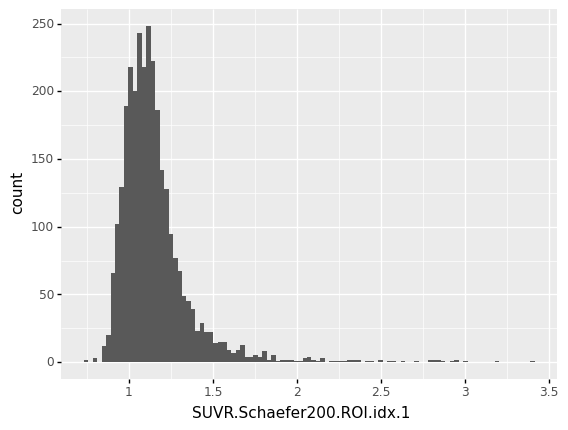

<ggplot: (8759343177113)>

In [8]:
(ggplot(schaefer_data, aes('SUVR.Schaefer200.ROI.idx.1'))
 + geom_histogram())

In [9]:
schaefer_data.isna().sum().sum()

0

In [10]:
diagnosis_cols = ["UID", "ID", "DX", "ADNI_MEM", "ADNI_EF", "ADNI_LAN", "ADNI_VS"]
diagnosis_data = adni_data[diagnosis_cols]
diagnosis_data

,UID,ID,DX,ADNI_MEM,ADNI_EF,ADNI_LAN,ADNI_VS
0,0,sub-0021,CN,2.217,0.565,1.438,0.706
1,1,sub-0021,CN,1.406,-0.493,0.554,0.706
2,2,sub-0021,CN,1.526,0.766,1.413,0.706
3,3,sub-0021,CN,1.692,1.236,0.975,-0.104
4,4,sub-0021,CN,1.406,-0.493,0.554,0.706
...,...,...,...,...,...,...,...
2958,2958,sub-6887,MCI,NaN,NaN,NaN,NaN
2959,2959,sub-6888,MCI,NaN,NaN,NaN,NaN
2960,2960,sub-6889,MCI,NaN,NaN,NaN,NaN
2961,2961,sub-6890,MCI,NaN,NaN,NaN,NaN


In [11]:
diagnosis_data["DX"].unique()

array(['CN', 'MCI', 'Dementia'], dtype=object)

In [12]:
diagnosis_plot_data = pd.melt(diagnosis_data,
                              id_vars=['UID', 'DX'],
                              value_vars=['ADNI_MEM', 'ADNI_EF', 'ADNI_LAN', 'ADNI_VS'],
                              var_name='test', value_name='score')
diagnosis_plot_data

,UID,DX,test,score
0,0,CN,ADNI_MEM,2.217
1,1,CN,ADNI_MEM,1.406
2,2,CN,ADNI_MEM,1.526
3,3,CN,ADNI_MEM,1.692
4,4,CN,ADNI_MEM,1.406
...,...,...,...,...
11847,2958,MCI,ADNI_VS,NaN
11848,2959,MCI,ADNI_VS,NaN
11849,2960,MCI,ADNI_VS,NaN
11850,2961,MCI,ADNI_VS,NaN


/home/niklas/.local/lib/python3.10/site-packages/plotnine/utils.py:371: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
/home/niklas/.local/lib/python3.10/site-packages/plotnine/utils.py:371: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
/home/niklas/.local/lib/python3.10/site-packages/plotnine/layer.py:324: PlotnineWarning: stat_boxplot : Removed 149 rows containing non-finite values.
/home/niklas/.local/lib/python3.10/site-packages/plotnine/stats/stat_smooth.py:201: PlotnineWarning: Smoothing requires 2 or more points. Got 1. Not enough points for smoothing. If this message a surprise, make sure the column mapped to the x aesthetic has the right dtype.
/home/niklas/.local/lib/python3.10/site-packages/plotnine/stats/stat_smooth.py:201: PlotnineWarning: Smoothing requires 2 or more points. Got 1. Not enough points fo

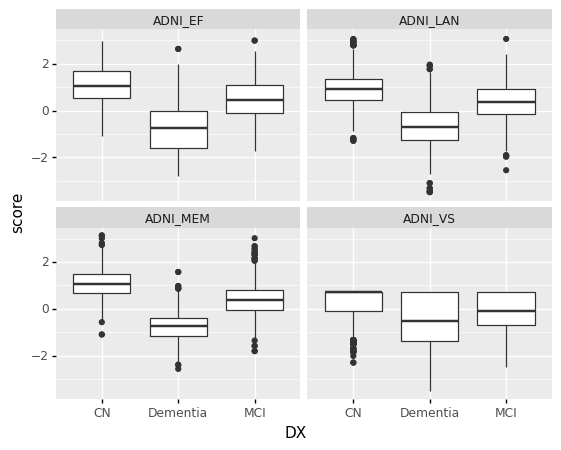

<ggplot: (8759343162474)>

In [13]:
(ggplot(diagnosis_plot_data, aes('DX', 'score'))
 + geom_boxplot()
 + stat_smooth(method='lm')
 + facet_wrap('~test'))

In [14]:
diagnosis_data.isna().sum()

UID          0
ID           0
DX           0
ADNI_MEM    31
ADNI_EF     63
ADNI_LAN    27
ADNI_VS     28
dtype: int64

In [15]:
subject_data = adni_data[["UID", "ID", "ses"]]
sub_idx = subject_data["ID"].unique()
num_sub = len(sub_idx)
num_ses = len(subject_data)
print("Num subjects: " + str(num_sub))
print("Num sessions: " + str(num_ses))

Num subjects: 793
Num sessions: 2963


In [16]:
total_count = len(diagnosis_data)
CN_count = len(diagnosis_data.loc[diagnosis_data["DX"] == "CN"])
MCI_count = len(diagnosis_data.loc[diagnosis_data["DX"] == "MCI"])
Dementia_count = len(diagnosis_data.loc[diagnosis_data["DX"] == "Dementia"])
print("Label counts across whole data set:")
print("CN: " + str(CN_count) + "/" + str(total_count) + " ("+  '{0:.2f}'.format(CN_count/total_count) +"%)")
print("MCI: " + str(MCI_count) + "/" + str(total_count) + " ("+  '{0:.2f}'.format(MCI_count/total_count) +"%)")
print("Dementia: " + str(Dementia_count) + "/" + str(total_count) + " ("+  '{0:.2f}'.format(Dementia_count/total_count) +"%)")

Label counts across whole data set:
CN: 1647/2963 (0.56%)
MCI: 1020/2963 (0.34%)
Dementia: 296/2963 (0.10%)


In [17]:
# Split on subjects, not sessions
train_mask = np.random.rand(num_sub) < 0.8
train_sub = sub_idx[train_mask]
test_sub = sub_idx[~train_mask]
train_ses = subject_data.loc[subject_data["ID"].isin(train_sub)]
test_ses = subject_data.loc[subject_data["ID"].isin(test_sub)]

# Print split
train_sub_perc = len(train_sub) / len(sub_idx)
test_sub_perc = len(test_sub) / len(sub_idx)
train_ses_perc = len(train_ses) / len(subject_data)
test_ses_perc = len(test_ses) / len(subject_data)
print("Train data: " + str(len(train_sub)) + " subjects (" + '{0:.2f}'.format(train_sub_perc) + "%), " + str(len(train_ses)) + " sessions (" + '{0:.2f}'.format(train_ses_perc) + "%).")
print("Test data: " + str(len(test_sub)) + " subjects (" + '{0:.2f}'.format(test_sub_perc) + "%), " + str(len(test_ses)) + " sessions (" + '{0:.2f}'.format(test_ses_perc) + "%).")

Train data: 630 subjects (0.79%), 2333 sessions (0.79%).
Test data: 163 subjects (0.21%), 630 sessions (0.21%).


In [18]:
train_data = adni_data.loc[adni_data["ID"].isin(train_sub)]
test_data = adni_data.loc[adni_data["ID"].isin(test_sub)]

# Features
train_feats = train_data[schaefer_cols].drop("UID", axis=1)
test_feats = test_data[schaefer_cols].drop("UID", axis=1)

# Diagnosis Data
train_diag = diagnosis_data.loc[diagnosis_data["ID"].isin(train_sub)]
test_diag = diagnosis_data.loc[diagnosis_data["ID"].isin(test_sub)]

# Labels
lab_dict = {"CN": 0, "MCI": 1, "Dementia": 2}
train_labs = train_data[diagnosis_cols]["DX"].map(lab_dict)
test_labs = test_data[diagnosis_cols]["DX"].map(lab_dict)

In [19]:
train_diag = train_data[diagnosis_cols]
total_count_train = len(train_diag)
CN_count_train = len(train_diag.loc[train_diag["DX"] == "CN"])
MCI_count_train = len(train_diag.loc[train_diag["DX"] == "MCI"])
Dementia_count_train = len(train_diag.loc[train_diag["DX"] == "Dementia"])
print("Label counts across train split:")
print("CN: " + str(CN_count_train) + "/" + str(total_count_train) + " ("+  '{0:.2f}'.format(CN_count_train/total_count_train) +")")
print("MCI: " + str(MCI_count_train) + "/" + str(total_count_train) + " ("+  '{0:.2f}'.format(MCI_count_train/total_count_train) +")")
print("Dementia: " + str(Dementia_count_train) + "/" + str(total_count_train) + " ("+  '{0:.2f}'.format(Dementia_count_train/total_count_train) +")")

Label counts across train split:
CN: 1282/2333 (0.55)
MCI: 812/2333 (0.35)
Dementia: 239/2333 (0.10)


In [20]:
test_diag = test_data[diagnosis_cols]
total_count_test = len(test_diag)
CN_count_test = len(test_diag.loc[test_diag["DX"] == "CN"])
MCI_count_test = len(test_diag.loc[test_diag["DX"] == "MCI"])
Dementia_count_test = len(test_diag.loc[test_diag["DX"] == "Dementia"])
print("Label counts across test split:")
print("CN: " + str(CN_count_test) + "/" + str(total_count_test) + " ("+  '{0:.2f}'.format(CN_count_test/total_count_test) +")")
print("MCI: " + str(MCI_count_test) + "/" + str(total_count_test) + " ("+  '{0:.2f}'.format(MCI_count_test/total_count_test) +")")
print("Dementia: " + str(Dementia_count_test) + "/" + str(total_count_test) + " ("+  '{0:.2f}'.format(Dementia_count_test/total_count_test) +")")

Label counts across test split:
CN: 365/630 (0.58)
MCI: 208/630 (0.33)
Dementia: 57/630 (0.09)


In [21]:
train_feats

,SUVR.Schaefer200.ROI.idx.1,SUVR.Schaefer200.ROI.idx.2,SUVR.Schaefer200.ROI.idx.3,SUVR.Schaefer200.ROI.idx.4,SUVR.Schaefer200.ROI.idx.5,SUVR.Schaefer200.ROI.idx.6,SUVR.Schaefer200.ROI.idx.7,SUVR.Schaefer200.ROI.idx.8,SUVR.Schaefer200.ROI.idx.9,SUVR.Schaefer200.ROI.idx.10,...,SUVR.Schaefer200.ROI.idx.191,SUVR.Schaefer200.ROI.idx.192,SUVR.Schaefer200.ROI.idx.193,SUVR.Schaefer200.ROI.idx.194,SUVR.Schaefer200.ROI.idx.195,SUVR.Schaefer200.ROI.idx.196,SUVR.Schaefer200.ROI.idx.197,SUVR.Schaefer200.ROI.idx.198,SUVR.Schaefer200.ROI.idx.199,SUVR.Schaefer200.ROI.idx.200
0,0.912861,1.027390,1.008220,0.805798,0.875110,0.821643,0.907071,1.034550,0.975376,0.970879,...,0.912689,1.06826,1.246190,0.865687,0.763793,0.98544,0.871139,1.034290,0.942815,0.804263
1,1.126000,1.170820,1.251360,1.048210,1.180930,1.010690,1.149200,1.288490,1.217560,1.180050,...,1.112320,1.14397,1.188070,1.053550,1.043640,1.14649,1.056160,1.140230,1.225610,1.112540
2,0.899505,0.988366,1.033340,0.765973,0.853984,0.795635,0.923348,1.050390,0.944791,1.031860,...,0.903087,1.08784,1.376050,0.854033,0.780502,1.04015,0.830035,1.026090,0.954537,0.799052
3,1.007220,1.088650,0.970595,0.893735,0.827041,0.857132,0.942682,0.978126,0.934361,1.047950,...,0.961301,1.13277,1.317870,1.030850,0.952838,1.17161,1.013260,1.032840,0.994306,0.864386
4,0.877004,0.913539,1.023010,0.767148,0.865806,0.748623,0.910673,1.133450,1.013790,0.991241,...,0.955938,1.05976,1.331580,0.888267,0.894880,1.12678,0.993033,0.982823,1.022410,0.888255
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2957,1.342800,1.200360,1.504430,1.075730,1.112080,1.133720,1.094110,1.587110,1.339280,1.127140,...,1.179740,1.28267,1.110830,1.091840,0.960957,1.19296,1.046110,1.154880,1.281010,1.225540
2958,1.218620,1.122030,1.111030,1.125010,0.855755,1.137070,0.969142,1.205230,1.111000,1.124710,...,1.121840,1.07066,1.138020,1.082990,1.139270,1.40042,1.285760,1.172920,1.406240,1.263950
2960,1.183060,1.099880,1.135840,1.040360,1.015300,1.062880,1.022340,1.191660,1.128320,1.073750,...,1.120020,1.09521,1.044810,1.090510,0.972702,1.11362,1.044490,1.087520,1.175900,1.111850
2961,1.087770,1.175930,1.232470,1.085160,1.247990,0.954582,1.172260,1.159190,1.228610,1.045060,...,1.020380,1.05419,0.990162,1.047310,0.939460,1.02765,1.016240,1.050370,1.156320,1.206880


In [22]:
train_labs

0       0
1       0
2       0
3       0
4       0
       ..
2957    0
2958    1
2960    1
2961    1
2962    1
Name: DX, Length: 2333, dtype: int64

## Predicting Binary Diagnosis

### Data Processing
Create binary labels by grouping together "MCI" and "Dementia" diagnoses:

In [23]:
train_labs_bin = train_labs > 0
test_labs_bin = test_labs > 0

### Linear Regression

In [24]:
reg = LinearRegression().fit(train_feats, train_labs_bin)
reg.score(train_feats, train_labs_bin)

0.32276152336022235

In [25]:
reg.coef_

array([ 0.68857491, -0.56246186,  0.09640093,  0.02079104,  0.54240444,
       -0.2057474 ,  0.20613395, -0.26028479, -0.20189955, -0.01915645,
       -0.01650162, -0.40409152,  0.07311639, -0.08351285, -0.71974477,
        1.13205925, -0.31142341,  0.41221726,  0.3049376 , -0.22120954,
       -0.18834883,  0.51144947,  0.16561343,  0.2912054 ,  0.60170848,
        0.2578986 , -1.27771175, -0.31244519, -0.44078147,  0.18768944,
        0.14960528, -0.33840662,  0.67572582, -0.96472012,  0.11350651,
       -0.73938692, -0.31642963,  0.1928158 , -0.03131305,  0.75683761,
       -0.41127119,  0.10518081, -0.05688106,  0.28749571, -0.62577015,
        0.81966179,  0.27692759,  0.14550981,  0.07874431, -0.03875876,
        0.59359813,  0.46216471,  0.02038881, -0.19813394,  0.56343726,
       -0.08680179, -0.38886488,  0.10723054, -0.03002889, -0.09148293,
       -0.03244312, -0.33865618,  0.73507458, -0.07078341,  0.0331819 ,
        0.31565483, -0.78109958, -0.77993996, -0.31463687, -0.27

In [26]:
reg.predict(test_feats)

array([ 0.32397142,  0.60006219,  0.5390917 ,  0.70395694,  0.26575222,
        0.22822008,  0.92178602,  0.99805888,  1.00816118,  0.32290778,
        0.30675494,  0.44911456,  0.75786282,  0.39964406,  0.61087383,
        0.53381972,  0.56849383,  0.47493192,  0.16446926,  0.24771837,
        0.31692094,  0.1504135 ,  0.27067891,  0.17064431,  0.26843814,
        0.19895146,  0.29016226,  0.30345469,  0.24440186,  0.03898863,
        0.03025302,  1.04722695,  0.9237149 ,  0.84771065,  1.18372204,
        1.01581859,  1.21705533,  0.09345569,  0.37174714,  0.18956332,
        0.2778247 ,  0.29025996,  0.20586214,  0.44825716,  0.66773585,
        0.33068995,  0.56147521,  0.7356817 ,  0.67565615,  0.59611067,
        0.17710988,  0.8940283 ,  0.44856206,  0.52488423,  0.87368929,
        0.6273122 ,  0.9608516 ,  0.33744511,  0.69338516,  0.28990262,
        0.65371831,  0.16160032,  0.48303855,  0.39511286,  0.45840775,
        0.47482935,  0.3916754 ,  0.31525884,  0.32417102,  0.18

In [27]:
cor_test = np.sum([i==j for i, j in zip(reg.predict(test_feats) > 0.5, test_labs_bin)])

print("Correct test predictions: " + str(cor_test) + "/" + str(len(test_labs_bin)) + ". Accuracy: " + str(cor_test/len(test_labs_bin)))

Correct test predictions: 394/630. Accuracy: 0.6253968253968254


In [28]:
cor_train = np.sum([i==j for i, j in zip(reg.predict(train_feats) > 0.5, train_labs_bin)])

print("Correct train predictions: " + str(cor_train) + "/" + str(len(train_labs_bin)) + ". Accuracy: " + str(cor_train/len(train_labs_bin)))

Correct train predictions: 1785/2333. Accuracy: 0.7651093013287612


In [29]:
test_pred = reg.predict(test_feats) > 0.5
f1 = f1_score(test_labs_bin, test_pred)
print("F1 Score: " + str(f1))

F1 Score: 0.5144032921810701


### MLP

In [30]:
mlp = MLPClassifier(random_state=1, max_iter=600, verbose=True).fit(train_feats, train_labs_bin)

Iteration 1, loss = 0.79467178
Iteration 2, loss = 0.70200903
Iteration 3, loss = 0.69067735
Iteration 4, loss = 0.68527548
Iteration 5, loss = 0.67366902
Iteration 6, loss = 0.66829800
Iteration 7, loss = 0.66337996
Iteration 8, loss = 0.65929126
Iteration 9, loss = 0.65922866
Iteration 10, loss = 0.66180619
Iteration 11, loss = 0.65608023
Iteration 12, loss = 0.65424082
Iteration 13, loss = 0.65348622
Iteration 14, loss = 0.64950307
Iteration 15, loss = 0.64628603
Iteration 16, loss = 0.64446033
Iteration 17, loss = 0.64400290
Iteration 18, loss = 0.65313282
Iteration 19, loss = 0.66338628
Iteration 20, loss = 0.65019139
Iteration 21, loss = 0.64474613
Iteration 22, loss = 0.63984935
Iteration 23, loss = 0.63822728
Iteration 24, loss = 0.64096018
Iteration 25, loss = 0.63727226
Iteration 26, loss = 0.63535239
Iteration 27, loss = 0.64048354
Iteration 28, loss = 0.64354263
Iteration 29, loss = 0.63703367
Iteration 30, loss = 0.63252290
Iteration 31, loss = 0.63176754
Iteration 32, los

In [31]:
mlp.score(test_feats, test_labs_bin)

0.6587301587301587

In [32]:
test_pred = mlp.predict(test_feats)
f1_score(test_labs_bin, test_pred)

0.5825242718446602

In [33]:
d = {"loss": mlp.loss_curve_, "iter": [i for i in range(len(mlp.loss_curve_))]}
loss_data = pd.DataFrame(data = d)

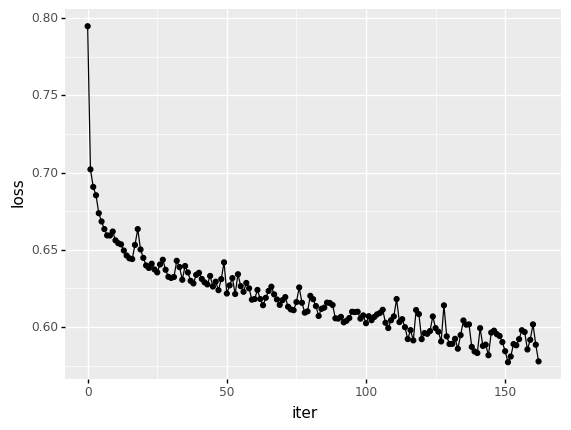

<ggplot: (8759343163095)>

In [34]:
(ggplot(loss_data, aes('iter', 'loss'))
 + geom_line()
 + geom_point())

# Predicting Test Results

## Data Preparation

In [35]:
train_diag

,UID,ID,DX,ADNI_MEM,ADNI_EF,ADNI_LAN,ADNI_VS
0,0,sub-0021,CN,2.217,0.565,1.438,0.706
1,1,sub-0021,CN,1.406,-0.493,0.554,0.706
2,2,sub-0021,CN,1.526,0.766,1.413,0.706
3,3,sub-0021,CN,1.692,1.236,0.975,-0.104
4,4,sub-0021,CN,1.406,-0.493,0.554,0.706
...,...,...,...,...,...,...,...
2957,2957,sub-6886,CN,NaN,NaN,NaN,NaN
2958,2958,sub-6887,MCI,NaN,NaN,NaN,NaN
2960,2960,sub-6889,MCI,NaN,NaN,NaN,NaN
2961,2961,sub-6890,MCI,NaN,NaN,NaN,NaN


In [36]:
train_diag.isna().sum()

UID          0
ID           0
DX           0
ADNI_MEM    29
ADNI_EF     52
ADNI_LAN    25
ADNI_VS     26
dtype: int64

In [37]:
test_diag.isna().sum()

UID          0
ID           0
DX           0
ADNI_MEM     2
ADNI_EF     11
ADNI_LAN     2
ADNI_VS      2
dtype: int64

In [38]:
train_na_ids = train_diag.isna()
test_na_ids = test_diag.isna()

## Predicting ADNI_MEM

In [108]:
train_feats_clean = train_feats.loc[~train_na_ids["ADNI_MEM"]]
train_labs_clean = train_diag["ADNI_MEM"].loc[~train_na_ids["ADNI_MEM"]]

test_feats_clean = test_feats.loc[~test_na_ids["ADNI_MEM"]]
test_labs_clean = test_diag["ADNI_MEM"].loc[~test_na_ids["ADNI_MEM"]]

In [109]:
len(train_feats_clean)

2304

In [110]:
len(test_feats_clean)

628

In [111]:
reg_mem = LinearRegression().fit(train_feats_clean, train_labs_clean)
reg_mem.score(train_feats_clean, train_labs_clean)

0.45209244062267584

In [112]:
reg_mem.coef_

array([-6.18745543e-01,  9.80575533e-01,  2.09176678e-02, -7.50272128e-01,
       -2.84393192e-01, -7.26340153e-02, -7.63486983e-01,  8.11616157e-01,
       -3.09346194e-01,  1.28905793e+00, -5.24295197e-01, -3.36124546e-01,
        6.90338930e-01, -3.88964922e-01,  1.38176282e+00, -1.09840238e+00,
        3.47528982e-01, -5.21564596e-01,  5.57538525e-01, -2.34494140e-01,
        6.70287416e-01, -1.13807443e+00,  3.90866592e-01, -1.22362225e+00,
       -6.85685511e-01, -4.15509582e-01,  1.35632993e+00,  1.15117588e+00,
        7.05847354e-01,  1.35140177e-01, -1.80279889e+00,  4.45102190e-01,
       -3.08585399e-01,  7.07374232e-01, -6.03233465e-02,  6.18724228e-01,
        1.35432947e-01,  2.29806692e-01, -2.43529543e-02, -1.29964379e+00,
        4.02566694e-01, -6.55486787e-01, -2.83912705e-01, -8.87820689e-01,
        3.14845472e-02, -5.80057024e-01, -5.57172866e-01,  4.17160615e-01,
       -4.41792785e-01,  8.75353811e-01, -6.38718860e-01, -1.85523022e-02,
       -1.86302127e-01,  

In [113]:
pred = reg_mem.predict(test_feats_clean)
r2_score(test_labs_clean, pred)

0.06895109272809052

In [114]:
reg_mem.score(test_feats_clean, test_labs_clean)

0.06895109272809052

### Comparing to an MLP

In [128]:
mlp_mem = MLPRegressor(random_state=1, max_iter=600, verbose=True, learning_rate_init=0.0001).fit(train_feats_clean, train_labs_clean)

Iteration 1, loss = 2.93385649
Iteration 2, loss = 0.71301439
Iteration 3, loss = 0.42921147
Iteration 4, loss = 0.44120804
Iteration 5, loss = 0.39416333
Iteration 6, loss = 0.39244533
Iteration 7, loss = 0.38657249
Iteration 8, loss = 0.38029166
Iteration 9, loss = 0.37386900
Iteration 10, loss = 0.37009976
Iteration 11, loss = 0.36744458
Iteration 12, loss = 0.36545878
Iteration 13, loss = 0.36319199
Iteration 14, loss = 0.36172078
Iteration 15, loss = 0.36003090
Iteration 16, loss = 0.35815818
Iteration 17, loss = 0.35565282
Iteration 18, loss = 0.35423674
Iteration 19, loss = 0.35307436
Iteration 20, loss = 0.35113569
Iteration 21, loss = 0.34983305
Iteration 22, loss = 0.34856477
Iteration 23, loss = 0.34732192
Iteration 24, loss = 0.34612409
Iteration 25, loss = 0.34439659
Iteration 26, loss = 0.34365453
Iteration 27, loss = 0.34180819
Iteration 28, loss = 0.34085028
Iteration 29, loss = 0.33981345
Iteration 30, loss = 0.33854615
Iteration 31, loss = 0.33722901
Iteration 32, los

Iteration 255, loss = 0.26807934
Iteration 256, loss = 0.26664438
Iteration 257, loss = 0.26624118
Iteration 258, loss = 0.26696117
Iteration 259, loss = 0.26635581
Iteration 260, loss = 0.26590729
Iteration 261, loss = 0.26804854
Iteration 262, loss = 0.26644446
Iteration 263, loss = 0.26829668
Iteration 264, loss = 0.26705962
Iteration 265, loss = 0.26555407
Iteration 266, loss = 0.26570313
Iteration 267, loss = 0.26495051
Iteration 268, loss = 0.26487957
Iteration 269, loss = 0.26439111
Iteration 270, loss = 0.26510074
Iteration 271, loss = 0.26520284
Iteration 272, loss = 0.26429499
Iteration 273, loss = 0.26429010
Iteration 274, loss = 0.26466728
Iteration 275, loss = 0.26418323
Iteration 276, loss = 0.26329211
Iteration 277, loss = 0.26471120
Iteration 278, loss = 0.26448578
Iteration 279, loss = 0.26284779
Iteration 280, loss = 0.26345647
Iteration 281, loss = 0.26348466
Iteration 282, loss = 0.26343922
Iteration 283, loss = 0.26306809
Iteration 284, loss = 0.26299287
Iteration 

Iteration 509, loss = 0.24042663
Iteration 510, loss = 0.24039483
Iteration 511, loss = 0.24048168
Iteration 512, loss = 0.24278532
Iteration 513, loss = 0.23934291
Iteration 514, loss = 0.24383475
Iteration 515, loss = 0.24320069
Iteration 516, loss = 0.24334203
Iteration 517, loss = 0.24082735
Iteration 518, loss = 0.23969214
Iteration 519, loss = 0.23850944
Iteration 520, loss = 0.23896615
Iteration 521, loss = 0.23936018
Iteration 522, loss = 0.24068526
Iteration 523, loss = 0.24106603
Iteration 524, loss = 0.23893238
Iteration 525, loss = 0.24011623
Iteration 526, loss = 0.24059972
Iteration 527, loss = 0.23907271
Iteration 528, loss = 0.23802770
Iteration 529, loss = 0.23812999
Iteration 530, loss = 0.23808697
Iteration 531, loss = 0.23880037
Iteration 532, loss = 0.23848315
Iteration 533, loss = 0.23882974
Iteration 534, loss = 0.24169616
Iteration 535, loss = 0.23873090
Iteration 536, loss = 0.23811763
Iteration 537, loss = 0.23773491
Iteration 538, loss = 0.24101501
Iteration 

In [129]:
mlp_mem.score(test_feats_clean, test_labs_clean)

0.23718681661684782

In [130]:
mlp_mem.score(train_feats_clean, train_labs_clean)

0.3636745908652089

In [131]:
d = {"loss": mlp_mem.loss_curve_, "iter": [i for i in range(len(mlp_mem.loss_curve_))]}
loss_data = pd.DataFrame(data = d)

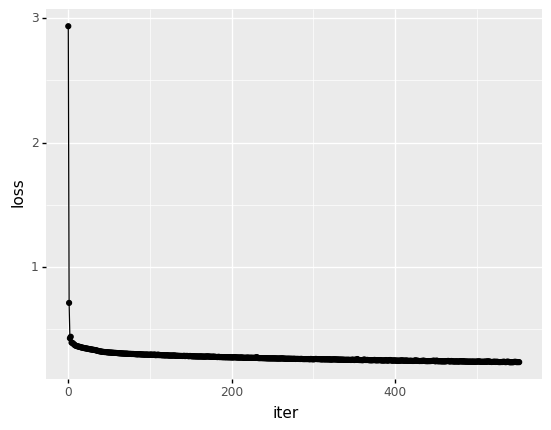

<ggplot: (8759343139063)>

In [132]:
(ggplot(loss_data, aes('iter', 'loss'))
 + geom_line()
 + geom_point())

## Predicting ADNI_EF

In [133]:
train_feats_clean = train_feats.loc[~train_na_ids["ADNI_EF"]]
train_labs_clean = train_diag["ADNI_EF"].loc[~train_na_ids["ADNI_EF"]]

test_feats_clean = test_feats.loc[~test_na_ids["ADNI_EF"]]
test_labs_clean = test_diag["ADNI_EF"].loc[~test_na_ids["ADNI_EF"]]

In [134]:
len(train_feats_clean)

2281

In [135]:
len(test_feats_clean)

619

In [136]:
reg_ef = LinearRegression().fit(train_feats_clean, train_labs_clean)
reg_ef.score(train_feats_clean, train_labs_clean)

0.4219025754867971

In [137]:
reg_ef.coef_

array([-3.97019940e-01,  1.21712611e+00, -6.65181315e-01, -3.29681716e-01,
       -2.78141024e-01, -3.75768146e-02, -1.02032257e+00,  1.54016189e+00,
        4.51682548e-01,  1.09782173e+00, -1.46220548e+00, -2.51105527e-02,
       -1.29251018e-01, -2.24750367e-01,  1.81867087e+00, -1.94459301e-01,
       -4.33354260e-01, -1.41244405e+00,  9.39390661e-01,  6.00909095e-01,
       -1.80876873e-02, -8.80342028e-01,  5.85375981e-01, -1.69889291e+00,
       -9.26584645e-01,  1.32449816e+00,  1.67874548e+00,  9.79964740e-01,
        1.60924670e-01, -3.01382328e-01, -4.79742503e-01, -6.82324749e-02,
       -2.21867757e-01, -5.96549304e-01,  5.18408034e-02,  4.56944818e-01,
       -6.72254732e-01, -8.32031110e-02, -2.16043632e-01, -5.27661773e-01,
       -6.98537773e-01,  3.26787128e-01, -5.63899978e-01, -1.46926537e+00,
        9.68891313e-01, -9.99658264e-01, -3.91295411e-01, -1.67124199e-01,
       -4.86987972e-01,  9.62785170e-01,  8.83164176e-01, -8.72046931e-02,
        1.43634022e-01, -

In [138]:
pred = reg_ef.predict(test_feats_clean)
r2_score(test_labs_clean, pred)

-0.00047787184579339836

### Comparing to an MLP

In [139]:
mlp_ef = MLPRegressor(random_state=1, max_iter=600, verbose=True, learning_rate_init=0.0001).fit(train_feats_clean, train_labs_clean)

Iteration 1, loss = 3.23416053
Iteration 2, loss = 0.96035194
Iteration 3, loss = 0.62387328
Iteration 4, loss = 0.63657292
Iteration 5, loss = 0.59183250
Iteration 6, loss = 0.58284970
Iteration 7, loss = 0.57468988
Iteration 8, loss = 0.56754430
Iteration 9, loss = 0.56090300
Iteration 10, loss = 0.55677423
Iteration 11, loss = 0.55212783
Iteration 12, loss = 0.54943304
Iteration 13, loss = 0.54679970
Iteration 14, loss = 0.54388852
Iteration 15, loss = 0.54017106
Iteration 16, loss = 0.53780675
Iteration 17, loss = 0.53542969
Iteration 18, loss = 0.53362178
Iteration 19, loss = 0.53064160
Iteration 20, loss = 0.52867563
Iteration 21, loss = 0.52647961
Iteration 22, loss = 0.52486386
Iteration 23, loss = 0.52336099
Iteration 24, loss = 0.52089546
Iteration 25, loss = 0.51948044
Iteration 26, loss = 0.51688918
Iteration 27, loss = 0.51562239
Iteration 28, loss = 0.51224713
Iteration 29, loss = 0.50913862
Iteration 30, loss = 0.50809190
Iteration 31, loss = 0.50437123
Iteration 32, los

Iteration 255, loss = 0.41604603
Iteration 256, loss = 0.41559846
Iteration 257, loss = 0.41482476
Iteration 258, loss = 0.41953784
Iteration 259, loss = 0.41607266
Iteration 260, loss = 0.41458164
Iteration 261, loss = 0.41696840
Iteration 262, loss = 0.41691759
Iteration 263, loss = 0.41309796
Iteration 264, loss = 0.41330865
Iteration 265, loss = 0.41348657
Iteration 266, loss = 0.41318323
Iteration 267, loss = 0.42148699
Iteration 268, loss = 0.41309085
Iteration 269, loss = 0.41264713
Iteration 270, loss = 0.41376487
Iteration 271, loss = 0.41437155
Iteration 272, loss = 0.41257721
Iteration 273, loss = 0.41473664
Iteration 274, loss = 0.41128637
Iteration 275, loss = 0.41244648
Iteration 276, loss = 0.41230958
Iteration 277, loss = 0.41840217
Iteration 278, loss = 0.41165012
Iteration 279, loss = 0.41612210
Iteration 280, loss = 0.41336740
Iteration 281, loss = 0.41130823
Iteration 282, loss = 0.41618754
Iteration 283, loss = 0.41289456
Iteration 284, loss = 0.40985304
Iteration 

In [140]:
mlp_ef.score(test_feats_clean, test_labs_clean)

0.20226215614055676

In [141]:
mlp_ef.score(train_feats_clean, train_labs_clean)

0.2928559426740208

In [142]:
d = {"loss": mlp_ef.loss_curve_, "iter": [i for i in range(len(mlp_ef.loss_curve_))]}
loss_data = pd.DataFrame(data = d)

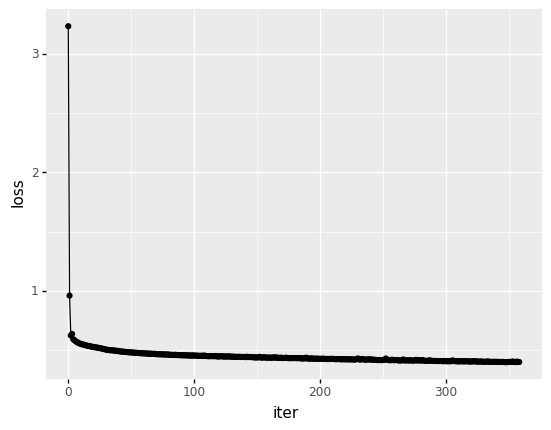

<ggplot: (8759342812824)>

In [143]:
(ggplot(loss_data, aes('iter', 'loss'))
 + geom_line()
 + geom_point())

## Predicting ADNI_LAN

In [144]:
train_feats_clean = train_feats.loc[~train_na_ids["ADNI_LAN"]]
train_labs_clean = train_diag["ADNI_LAN"].loc[~train_na_ids["ADNI_LAN"]]

test_feats_clean = test_feats.loc[~test_na_ids["ADNI_LAN"]]
test_labs_clean = test_diag["ADNI_LAN"].loc[~test_na_ids["ADNI_LAN"]]

In [145]:
len(train_feats_clean)

2308

In [146]:
len(test_feats_clean)

628

In [147]:
reg_lan = LinearRegression().fit(train_feats_clean, train_labs_clean)
reg_lan.score(train_feats_clean, train_labs_clean)

0.38270390955895894

In [148]:
reg_lan.coef_

array([-0.29133848,  0.28575227, -0.22750213, -0.30830797, -0.281991  ,
       -0.53956179, -1.01670723,  0.96428977,  0.6440392 ,  0.92874666,
       -1.26175935, -0.04272291,  0.17993671, -0.37085   ,  2.43052475,
       -0.99494758, -0.10353827, -1.28202095,  0.54328266,  0.54541265,
       -0.03995026, -0.85620309, -0.30111184, -1.13786273, -0.45415954,
        1.16155562,  1.39178689,  1.05984556, -0.28263186,  0.28715877,
       -0.81422203, -0.24546216,  0.36831402, -0.00936479, -0.14727462,
        0.76041063, -0.4747437 ,  0.54309495,  0.04721535, -1.7741599 ,
       -0.13240324, -0.38011097, -0.89038594, -1.20000136,  0.91107562,
       -0.89791281, -1.16355007,  0.54646888, -0.45749852,  1.42543033,
        0.4318996 ,  0.76802174,  0.18337635, -0.51378806, -1.04613891,
        0.13183604,  0.20006271,  0.16704344,  0.20671579,  1.35036197,
        0.31107277, -0.71603864,  0.08887163,  0.77735628,  0.2310126 ,
       -0.06854052,  0.26151174, -0.48178747,  0.6540758 , -0.42

In [149]:
pred = reg_lan.predict(test_feats_clean)
r2_score(test_labs_clean, pred)

-0.16014631898439258

### Comparing to an MLP

In [159]:
mlp_lan = MLPRegressor(random_state=1, max_iter=600, verbose=True).fit(train_feats_clean, train_labs_clean)

Iteration 1, loss = 1.28952975
Iteration 2, loss = 0.67248530
Iteration 3, loss = 0.50178090
Iteration 4, loss = 0.44411796
Iteration 5, loss = 0.43148223
Iteration 6, loss = 0.42453388
Iteration 7, loss = 0.42333195
Iteration 8, loss = 0.41681857
Iteration 9, loss = 0.41205136
Iteration 10, loss = 0.41295316
Iteration 11, loss = 0.40385447
Iteration 12, loss = 0.40237878
Iteration 13, loss = 0.39977998
Iteration 14, loss = 0.39782487
Iteration 15, loss = 0.39666642
Iteration 16, loss = 0.39508855
Iteration 17, loss = 0.39688762
Iteration 18, loss = 0.39154811
Iteration 19, loss = 0.39214629
Iteration 20, loss = 0.39304386
Iteration 21, loss = 0.39056220
Iteration 22, loss = 0.38414716
Iteration 23, loss = 0.38573676
Iteration 24, loss = 0.38170073
Iteration 25, loss = 0.38215749
Iteration 26, loss = 0.38188783
Iteration 27, loss = 0.38384172
Iteration 28, loss = 0.38392967
Iteration 29, loss = 0.37967085
Iteration 30, loss = 0.37649651
Iteration 31, loss = 0.37822302
Iteration 32, los

In [160]:
mlp_lan.score(test_feats_clean, test_labs_clean)

0.11526598815255962

In [161]:
mlp_lan.score(train_feats_clean, train_labs_clean)

0.25882436423800426

In [162]:
d = {"loss": mlp_lan.loss_curve_, "iter": [i for i in range(len(mlp_lan.loss_curve_))]}
loss_data = pd.DataFrame(data = d)

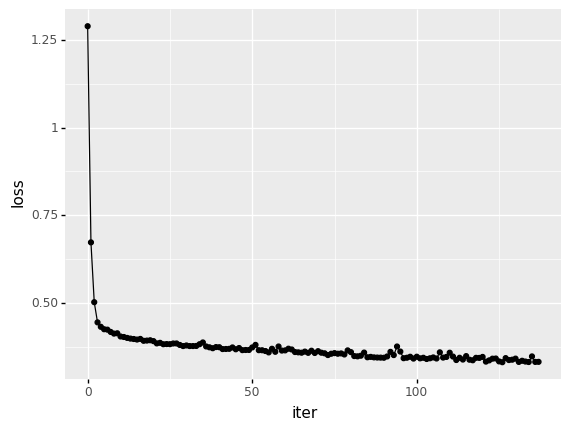

<ggplot: (8759342707734)>

In [163]:
(ggplot(loss_data, aes('iter', 'loss'))
 + geom_line()
 + geom_point())

## Predicting ADNI_VS

In [174]:
train_feats_clean = train_feats.loc[~train_na_ids["ADNI_VS"]]
train_labs_clean = train_diag["ADNI_VS"].loc[~train_na_ids["ADNI_VS"]]

test_feats_clean = test_feats.loc[~test_na_ids["ADNI_VS"]]
test_labs_clean = test_diag["ADNI_VS"].loc[~test_na_ids["ADNI_VS"]]

In [175]:
len(train_feats_clean)

2307

In [176]:
len(test_feats_clean)

628

In [177]:
reg_vs = LinearRegression().fit(train_feats_clean, train_labs_clean)
reg_vs.score(train_feats_clean, train_labs_clean)

0.3118156461867554

In [178]:
reg_vs.coef_

array([-3.16599757e-03,  8.83211349e-01, -3.43264628e-01, -2.40551504e-01,
       -2.73140834e-01, -7.81303092e-01, -7.20563612e-01,  4.04203008e-01,
        4.29839407e-01,  1.23483952e+00, -1.60304151e+00, -1.41619068e-01,
       -8.08333619e-01,  4.32624718e-02,  4.48990261e-01, -3.25550929e-01,
       -3.52655764e-01, -1.39369849e+00,  2.61242631e-01,  2.74649398e-01,
       -9.33888533e-02, -6.21155260e-01,  3.64542880e-01, -9.43366298e-01,
       -4.68784864e-01,  6.99132177e-01,  1.43313462e+00,  7.98731114e-01,
        3.57413639e-01, -4.03654966e-01, -5.10420545e-01,  3.49243256e-01,
       -4.22398937e-02, -4.00333490e-02, -3.35845910e-01,  6.44790099e-01,
        1.94269462e-01,  3.25390932e-01,  2.31873900e-01, -1.49669647e+00,
       -2.93074633e-01,  1.30521974e-02, -4.53722126e-01, -1.93664453e-01,
        3.68286433e-02, -3.36637099e-01, -8.58399677e-03, -1.28038747e-01,
        2.45291942e-02,  1.58546487e+00,  1.06979003e-01, -9.33772169e-03,
       -2.05183629e-02,  

In [179]:
pred = reg_vs.predict(test_feats_clean)
r2_score(test_labs_clean, pred)

-0.20874260273221412

### Comparing to an MLP

In [188]:
mlp_lan = MLPRegressor(random_state=1, max_iter=600, verbose=True).fit(train_feats_clean, train_labs_clean)

Iteration 1, loss = 0.89614478
Iteration 2, loss = 0.41054889
Iteration 3, loss = 0.32106126
Iteration 4, loss = 0.30577305
Iteration 5, loss = 0.29806626
Iteration 6, loss = 0.29353679
Iteration 7, loss = 0.29194465
Iteration 8, loss = 0.28765369
Iteration 9, loss = 0.29088830
Iteration 10, loss = 0.28872223
Iteration 11, loss = 0.29205627
Iteration 12, loss = 0.28883672
Iteration 13, loss = 0.28375834
Iteration 14, loss = 0.28379598
Iteration 15, loss = 0.28515390
Iteration 16, loss = 0.28393177
Iteration 17, loss = 0.28164873
Iteration 18, loss = 0.28184180
Iteration 19, loss = 0.28625221
Iteration 20, loss = 0.28436004
Iteration 21, loss = 0.28650967
Iteration 22, loss = 0.28077766
Iteration 23, loss = 0.28258061
Iteration 24, loss = 0.28278418
Iteration 25, loss = 0.28048671
Iteration 26, loss = 0.27796583
Iteration 27, loss = 0.28034035
Iteration 28, loss = 0.27905198
Iteration 29, loss = 0.28127292
Iteration 30, loss = 0.27742984
Iteration 31, loss = 0.27873036
Iteration 32, los

In [189]:
mlp_lan.score(test_feats_clean, test_labs_clean)

-0.03626256618563639

In [190]:
mlp_lan.score(train_feats_clean, train_labs_clean)

0.18709619629833407

In [183]:
d = {"loss": mlp_lan.loss_curve_, "iter": [i for i in range(len(mlp_lan.loss_curve_))]}
loss_data = pd.DataFrame(data = d)

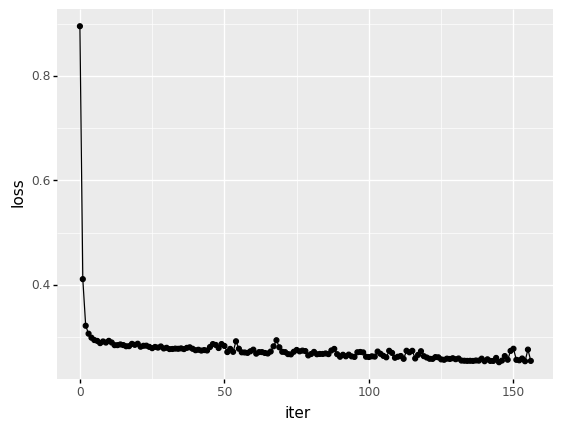

<ggplot: (8759342620375)>

In [184]:
(ggplot(loss_data, aes('iter', 'loss'))
 + geom_line()
 + geom_point())

## Interpretation

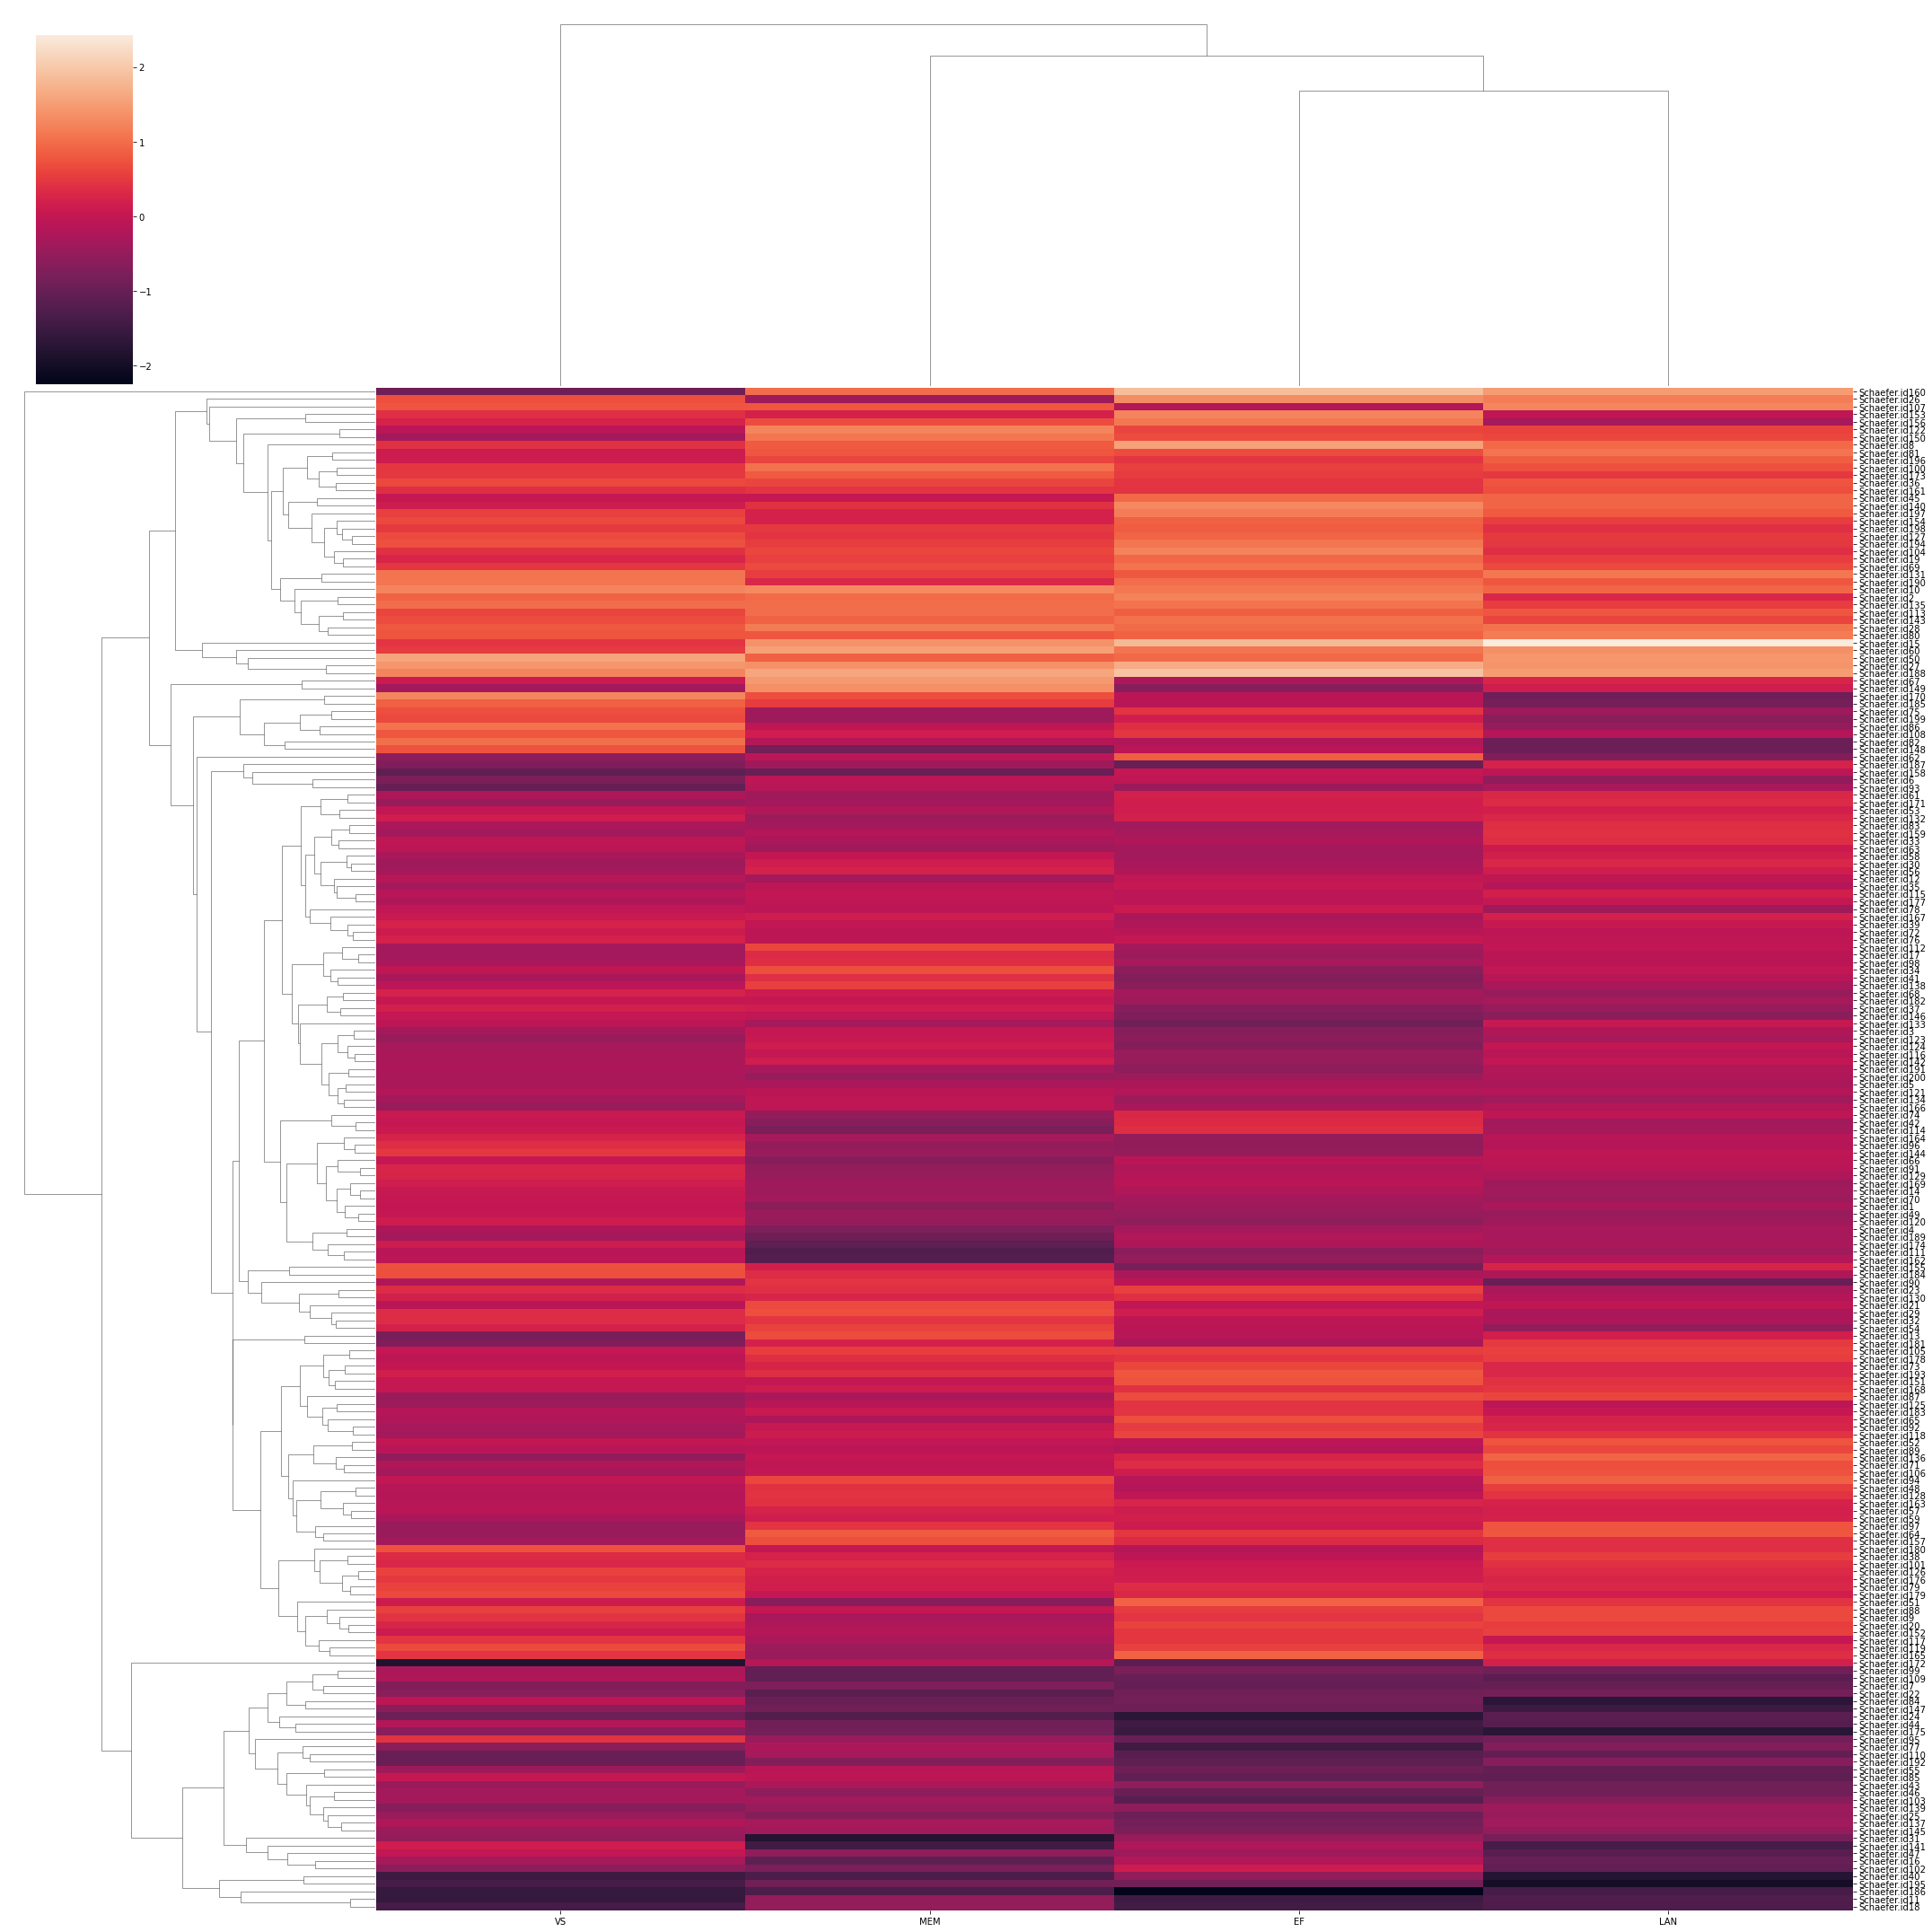

In [57]:
plot_data = pd.DataFrame(zip(reg_mem.coef_, reg_ef.coef_, reg_lan.coef_, reg_vs.coef_), columns = ["MEM", "EF", "LAN", "VS"])
plot_data.index = ["Schaefer.id" + str(i+1) for i in range(200)]
sns.clustermap(plot_data, xticklabels=True, yticklabels=True, figsize=(30, 30))

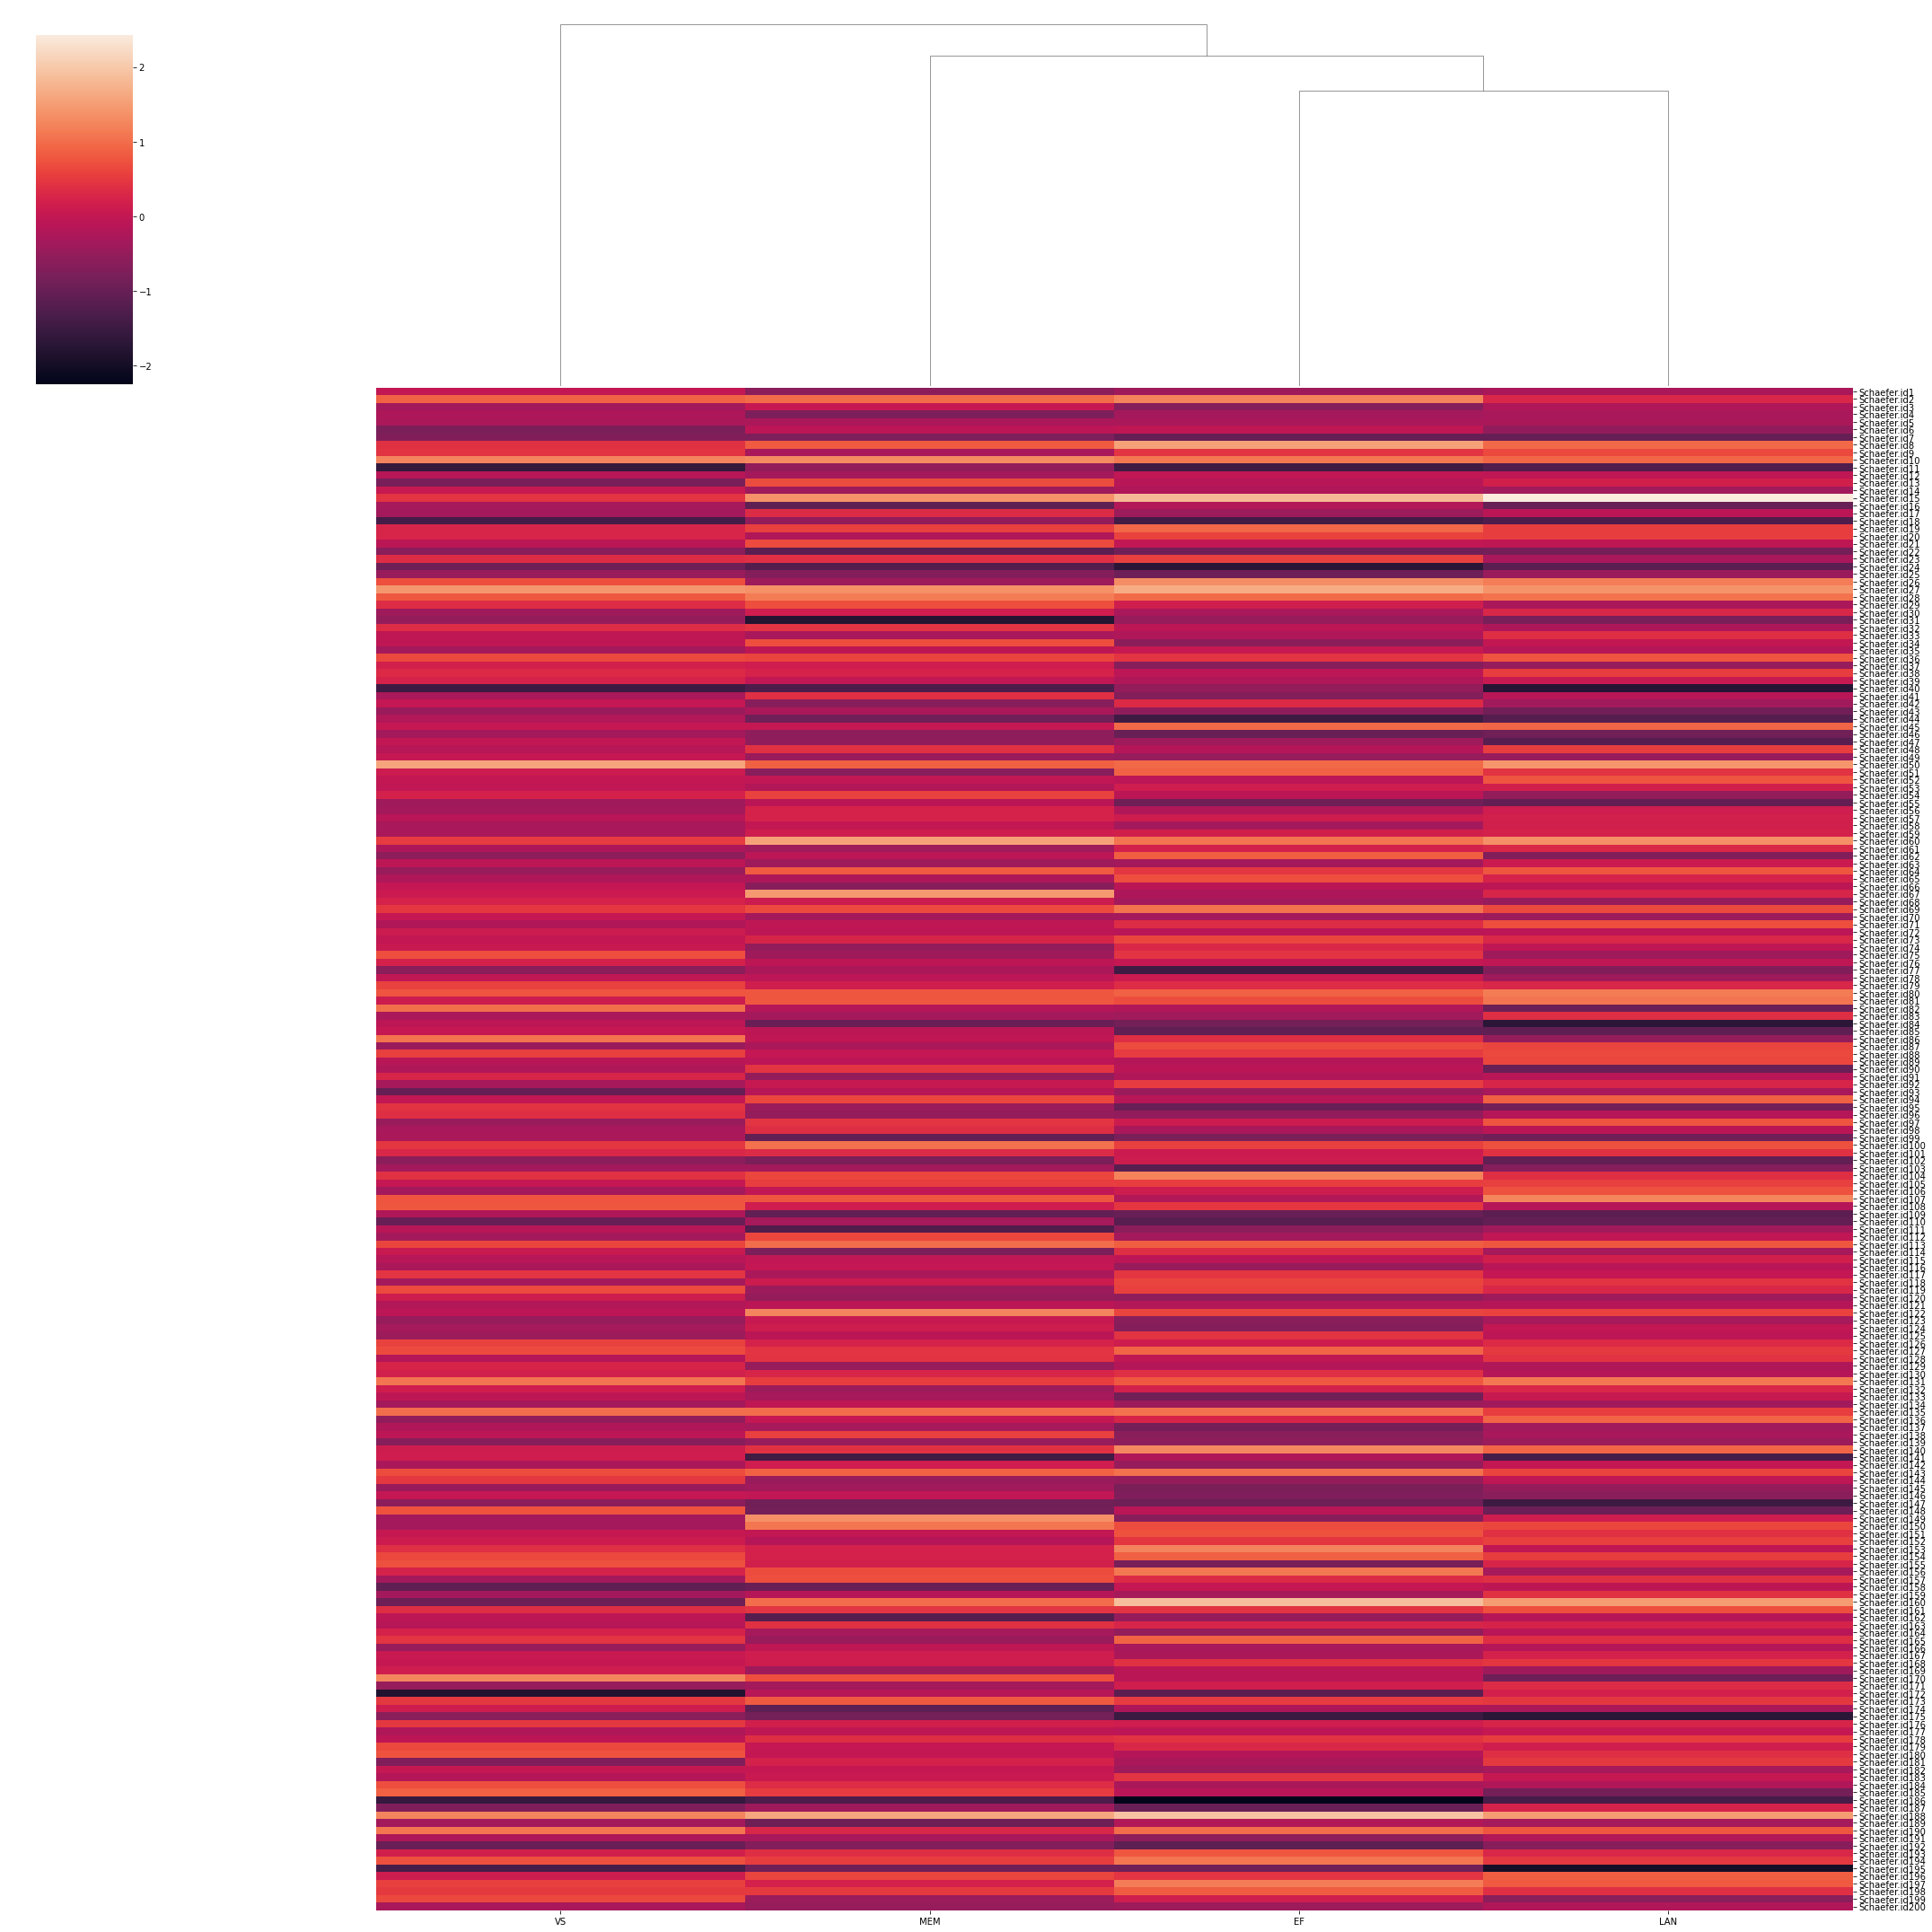

In [60]:
plot_data = pd.DataFrame(zip(reg_mem.coef_, reg_ef.coef_, reg_lan.coef_, reg_vs.coef_), columns = ["MEM", "EF", "LAN", "VS"])
plot_data.index = ["Schaefer.id" + str(i+1) for i in range(200)]
sns.clustermap(plot_data, xticklabels=True, yticklabels=True, figsize=(30, 30), row_cluster=False)

In [150]:
train_na_ids = train_diag["ADNI_MEM"].isna() | train_diag["ADNI_EF"].isna() | train_diag["ADNI_LAN"].isna() | train_diag["ADNI_VS"].isna()
test_na_ids = test_diag["ADNI_MEM"].isna() | test_diag["ADNI_EF"].isna() | test_diag["ADNI_LAN"].isna() | test_diag["ADNI_VS"].isna()

In [151]:
train_feats_clean = train_diag.loc[~train_na_ids][["ADNI_MEM", "ADNI_EF", "ADNI_LAN", "ADNI_VS"]]
train_labs_clean = train_diag["DX"].loc[~train_na_ids]

test_feats_clean = test_diag.loc[~test_na_ids][["ADNI_MEM", "ADNI_EF", "ADNI_LAN", "ADNI_VS"]]
test_labs_clean = test_diag["DX"].loc[~test_na_ids]

In [152]:
lab_dict = {"CN": 0, "MCI": 1, "Dementia": 2}
train_labs_clean = train_labs_clean.map(lab_dict)
test_labs_clean = test_labs_clean.map(lab_dict)
train_labs_bin = train_labs_clean > 0
test_labs_bin = test_labs_clean > 0

In [153]:
reg_dx = LinearRegression().fit(train_feats_clean, train_labs_bin)
reg_dx.score(train_feats_clean, train_labs_bin)

0.3296019529433116

In [154]:
reg_dx.coef_

array([-0.26431939, -0.05043603, -0.02830718, -0.00399854])

In [155]:
pred = reg_dx.predict(test_feats_clean)
r2_score(test_labs_bin, pred)

0.31050015009226595